# <p style="background-color:#0E6B57;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Project: Convolutional Neural Networks: Recognizing Street View Housing Number Digits</p>

**Context:**


Recognizing things in their natural settings is one of the most fascinating challenges in the field of deep
learning. The capacity to analyze visual information using machine learning algorithms may be highly
valuable, as shown by a variety of applications.
The SVHN dataset includes approximately 600,000 digits that have been identified and were clipped
from street-level photographs. It is one of the image recognition datasets that is used the most often. It
has been put to use in the neural networks that Google has developed in order to enhance the quality of
maps by automatically trancribing address numbers from individual pixel clusters. The combination of
the transcribed number and the known street address makes it easier to locate the building that the
number represents.

# <p style="background-color:#0E6B57;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Index</p>

<ul style="list-style-type:Upper-roman">
    <li><a href="#1">Import Libaries</a></li>
    <li><a href="#2">Import and Load Dataset</a></li>
    <li><a href="#3">EDA(Exploratory Data Analysis)</a></li>
    <li><a href="#4">Data Preprocessing</a></li>
    <li><a href="#5"> Build Custom Model</a></li>
    <li><a href="#6">Plot Model</a></li>
    <li><a href="#7">Model Training</a></li>
    <li><a href="#8">Model Prediction</a></li>
    <li><a href="#9">Confusion Matrix and ROC Curve</a></li>
    <li><a href="#10">ROC Curve</a></li>
    <li><a href="#11">Create Function to upload image and resulted output</a></li>
    <li><a href="#11">Summary</a></li>
    <li><a href="#11">Save and Load Model</a></li>

# <p style="background-color:#0E6B57;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Import Libaries</p>

In [2]:
#required software
#!pip3 install keras-visualizer

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

%matplotlib inline


import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D,  MaxPooling2D, AveragePooling2D, Activation, BatchNormalization, Dropout, Flatten, Dense 
from tensorflow.keras import backend as k
from tensorflow.keras.optimizers import  SGD, Adam 
import tensorflow as tf 
import keras
from tensorflow.keras.models import Model
from keras.layers.advanced_activations import LeakyReLU


from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, TensorBoard, ModelCheckpoint, LearningRateScheduler

#model visualization
#from keras_visualizer import visualizer 

#model flowchart
from tensorflow.keras.utils import plot_model


from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


from warnings import filterwarnings # ignore DeprecationWarning


import cv2 #openCv for images
import io #unstructured and semi-structured web data into structured data

from PIL import Image #pillow for img open, rotate and display

import ipywidgets as widgets  #import button
from IPython.display import display, clear_output #clear_output: clear process output while install

# <p style="background-color:#0E6B57;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Import and Load Dataset</p>


The dataset is supplied to you in the form of a.h5 file. All of the fundamental preprocessing procedure have been completed.

In [4]:
#we use h5py to import the preproccesed dataset in read only mode
import h5py

h5file = h5py.File('/kaggle/input/housenodigits/SVHN_single_grey1.h5', 'r')
print("Data Set details of h5: \n {}".format(h5file.keys()))

Data Set details of h5: 
 <KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>


# <p style="background-color:#0E6B57;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">EDA(Exploratory Data Analysis)</p>

In [5]:
#Features
X_train = h5file['X_train'][:]
X_test = h5file['X_test'][:]
X_val = h5file['X_val'][:]

#Targets
y_train = h5file['y_train'][:]
y_test = h5file['y_test'][:]
y_val = h5file['y_val'][:]

print("shape of X_train: {}".format(X_train.shape))
print("shape of y_train: {}".format(y_train.shape))
print("shape of X_test: {}".format(X_test.shape))
print("shape of y_test: {}".format(y_test.shape))
print("shape of X_val: {}".format(X_val.shape))
print("shape of y_val: {}".format(y_val.shape))

shape of X_train: (42000, 32, 32)
shape of y_train: (42000,)
shape of X_test: (18000, 32, 32)
shape of y_test: (18000,)
shape of X_val: (60000, 32, 32)
shape of y_val: (60000,)


In [6]:
print("unique value of y_train: {}".format(np.unique(y_train)))
print("unique value of y_test: {}".format(np.unique(y_test)))
print("unique value of y_val: {}".format(np.unique(y_val)))

unique value of y_train: [0 1 2 3 4 5 6 7 8 9]
unique value of y_test: [0 1 2 3 4 5 6 7 8 9]
unique value of y_val: [0 1 2 3 4 5 6 7 8 9]


In [7]:
def image_numbers(target_variable):
    unique, counts = np.unique(target_variable, return_counts=True)

    for x,y in zip(unique,counts):
        print("lable {} has {} images for training".format(x, y))

In [8]:
print("Details of Trainingset:\n")
print(image_numbers(y_train))

print("Details of Testingset:\n")
print(image_numbers(y_test))

Details of Trainingset:

lable 0 has 4186 images for training
lable 1 has 4172 images for training
lable 2 has 4197 images for training
lable 3 has 4281 images for training
lable 4 has 4188 images for training
lable 5 has 4232 images for training
lable 6 has 4168 images for training
lable 7 has 4192 images for training
lable 8 has 4188 images for training
lable 9 has 4196 images for training
None
Details of Testingset:

lable 0 has 1814 images for training
lable 1 has 1828 images for training
lable 2 has 1803 images for training
lable 3 has 1719 images for training
lable 4 has 1812 images for training
lable 5 has 1768 images for training
lable 6 has 1832 images for training
lable 7 has 1808 images for training
lable 8 has 1812 images for training
lable 9 has 1804 images for training
None


In [9]:

print("array details of X_train: \n \n {}".format(X_train[0:1]))

print("\n array details of X_test: \n \n {}".format(X_test[0:1]))

print("\n array details of X_val: \n \n {}".format(X_val[0:1]))


array details of X_train: 
 
 [[[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
  [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
  [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
  ...
  [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
  [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
  [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]]

 array details of X_test: 
 
 [[[ 40.558   46.7917  48.9764 ... 112.1153 112.9904 112.1646]
  [ 39.4379  44.2911  47.1768 ... 111.0122 110.9475 109.9368]
  [ 38.4488  43.6394  48.7098 ... 109.8921 109.9414 109.1048]
  ...
  [ 34.9869  35.4707  39.6676 ... 109.211  109.9074 112.7346]
  [ 35.6602  35.5462  40.3193 ... 110.9998 112.049  114.3431]
  [ 36.1871  35.4214  40.6998 ... 110.0169 111.2017 114.1906]]]

 array details of X_val: 
 
 [[[ 44.299   45.9999  51.3306 ...  25.2764  27.515   27.156 ]
  [ 49.1351  60.3081  70.1222 ...  23.7002  25.2378  24.2918]
  [ 60.7595  83.7141 102.

**<h3>Training Data</h3>**

In [10]:
def visualization_train(value, no_sub_rows, no_img_per_row):
    plt.figure(figsize=(30,10))

    for i in range(value):
        plt.subplot(no_sub_rows, no_img_per_row, i+1)
        plt.imshow(X_train[i], cmap = 'gray')
        plt.xlabel("label of image (y_train):{}".format(y_train[i]), fontsize=16)
        
    return plt.show()
       

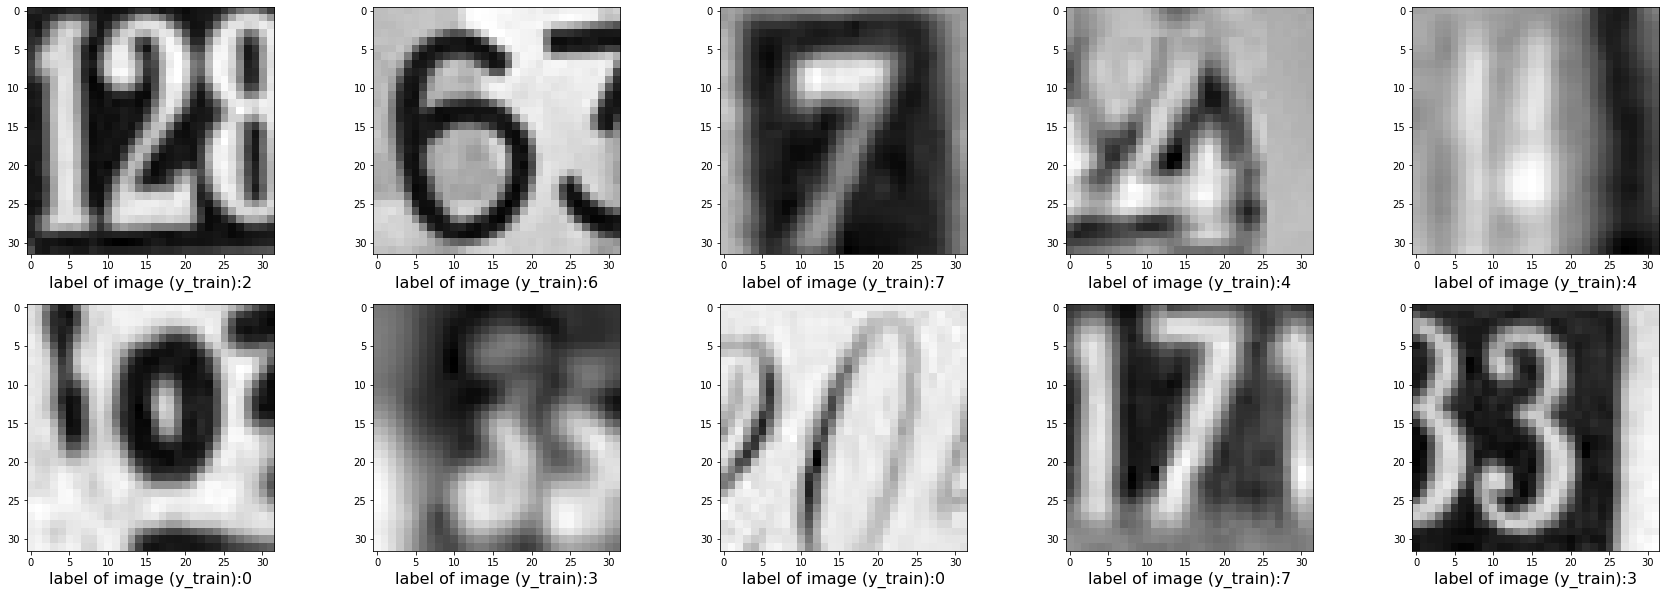

In [11]:
visualization_train(10, 2, 5)

**<h3>Testing Data</h3>**

In [12]:
def visualization_test(value, no_sub_rows, no_img_per_row):
    plt.figure(figsize=(30,10))

    for i in range(value):
        plt.subplot(no_sub_rows, no_img_per_row, i+1)
        plt.imshow(X_test[i], cmap = 'gray')
        plt.xlabel("label of image (y_test):{}".format(y_test[i]), fontsize=16)
        
    return plt.show()

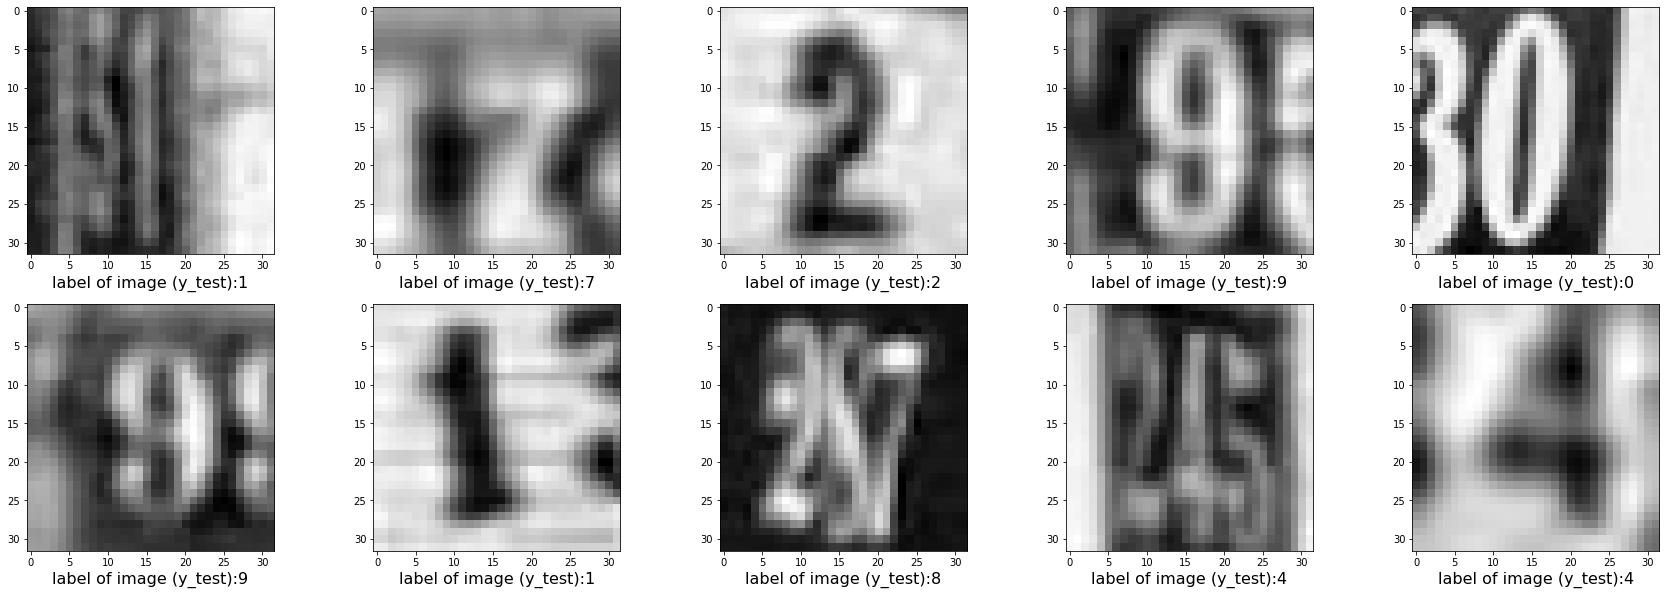

In [13]:
visualization_test(10, 2, 5)

# <p style="background-color:#0E6B57;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Data Preprocessing</p>


In [14]:
print("We have {} training images with width {} and height {}".format(X_train.shape[0], X_train.shape[1], X_train.shape[2]))

print("We have {} test images with width {} and height {}".format(X_test.shape[0], X_test.shape[1], X_test.shape[2]))

We have 42000 training images with width 32 and height 32
We have 18000 test images with width 32 and height 32


In [15]:
#training array
X_training = X_train.reshape(X_train.shape[0], X_train.shape[1],X_train.shape[2],1)

#testing array
X_testing = X_test.reshape(X_test.shape[0], X_test.shape[1],X_test.shape[2],1)

In [16]:
print("training data after reshaping: {}".format(X_training.shape))
print("testing data after reshaping: {}".format(X_testing.shape))

training data after reshaping: (42000, 32, 32, 1)
testing data after reshaping: (18000, 32, 32, 1)


**Data Normalization**

Normalization is a technique to prepare the data within a common range without distorting the information for machine learning. 

`random_state`: Randomness of a data wrt a certain point and produce same output every time. Setting a random_state can also be referred as a SEED in Numpy.

`random seed`: set an intial point to provide certain random integer number with every run [ex: outcome of dice roll. any out of 6].


In [17]:
#Randomness
SEED =42
np.random.seed (seed=SEED)


In [18]:
#for training set
X_train_norm = X_training/255.0
print("value after normalizing for training: \n \n {}".format(X_train_norm[0][0]))

#for testing set
X_test_norm = X_testing/255.0 
print("\n value after normalizing for testing: \n \n {}".format(X_test_norm[0][0]))


value after normalizing for training: 
 
 [[0.12968785]
 [0.11866706]
 [0.10530196]
 [0.10150745]
 [0.1119298 ]
 [0.13006786]
 [0.13296823]
 [0.1226549 ]
 [0.10718157]
 [0.09394353]
 [0.08373255]
 [0.08833648]
 [0.09524235]
 [0.12247922]
 [0.14624195]
 [0.14971608]
 [0.12113804]
 [0.09603412]
 [0.10973725]
 [0.09162392]
 [0.07755843]
 [0.09025843]
 [0.09692863]
 [0.09801608]
 [0.10811804]
 [0.15116628]
 [0.20719254]
 [0.2584459 ]
 [0.2884741 ]
 [0.2801847 ]
 [0.2283153 ]
 [0.16860352]]

 value after normalizing for testing: 
 
 [[0.15905097]
 [0.18349686]
 [0.19206432]
 [0.21576667]
 [0.2641443 ]
 [0.28089255]
 [0.2545498 ]
 [0.2429553 ]
 [0.27767214]
 [0.29365924]
 [0.2659149 ]
 [0.23936078]
 [0.19494666]
 [0.19317608]
 [0.20466158]
 [0.23191647]
 [0.22775961]
 [0.21712588]
 [0.2265451 ]
 [0.23786157]
 [0.2656545 ]
 [0.31633413]
 [0.36366627]
 [0.34983647]
 [0.35633764]
 [0.3896043 ]
 [0.41922784]
 [0.42807332]
 [0.44011492]
 [0.43966785]
 [0.44309962]
 [0.43986115]]


# <p style="background-color:#0E6B57;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Build Custom Model</p>

In [19]:
def custom_model():
    image_size = X_train.shape[1]

    model = Sequential()
    
    #input layer
    
    model.add(Conv2D(64, kernel_size = (5,5), padding = "same", activation = "relu", input_shape = (image_size, image_size,1)))
    model.add(AveragePooling2D(pool_size = (2,2), strides = 1))

    #hidden layer
    
    model.add(Conv2D(64, kernel_size = (5,5), padding = "same", activation = "LeakyReLU"))
    model.add(BatchNormalization())
    model.add(AveragePooling2D(pool_size = (2,2), strides = 2))
    model.add(Dropout(0.5)) #0.5 to 0.8
    
   
    model.add(Conv2D(64, kernel_size = (3,3), padding = "same", activation = "LeakyReLU"))
    model.add(Conv2D(32, kernel_size = (3,3), padding = "same", activation = "LeakyReLU"))
    model.add(BatchNormalization())
    model.add(AveragePooling2D(pool_size = (2,2), strides = 3))  
    model.add(Dropout(0.5))
    
    
    model.add(Conv2D(32, kernel_size = (3,3), padding = "same", activation = "LeakyReLU"))         
    model.add(Conv2D(16, kernel_size = (3,3), padding = "same", activation = "LeakyReLU"))
    model.add(BatchNormalization())
    model.add(AveragePooling2D(pool_size = (2,2), strides = 3)) 
    model.add(Dropout(0.5))

    #Flatten Layer
    
    model.add(Flatten())

    #Connecting or output layer
    
    model.add(Dense(5060, activation="relu"))

    model.add(Dense(4096, activation="relu"))

    model.add(Dense(10, activation="softmax"))
    
    
    
    
    return model

In [20]:
model = custom_model()
model.summary()

2023-01-19 06:07:31.360156: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-19 06:07:31.450753: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-19 06:07:31.451592: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1664      
_________________________________________________________________
average_pooling2d (AveragePo (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 31, 31, 64)        102464    
_________________________________________________________________
batch_normalization (BatchNo (None, 31, 31, 64)        256       
_________________________________________________________________
average_pooling2d_1 (Average (None, 15, 15, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        3

2023-01-19 06:07:31.453996: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-19 06:07:31.454298: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-19 06:07:31.455026: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-19 06:07:31.455695: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

In [21]:
#compile Model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer =tf.keras.optimizers.Adam(learning_rate=5e-4),
              metrics=["accuracy"])
    
#.h5 = Hierarchical Data Format Ver. 5 file, verbose =1, to see execution
tensorboard= TensorBoard(log_dir="logs")
checkpoint= ModelCheckpoint("custom_model.h5",
                           monitor="val_accuracy", verbose=1,
                           mode="auto", save_best_only=True)
#monitor: quantity to be monitored.     
#factor: factor by which the learning rate will be reduced. 
#patience: number of epochs with no improvement after which learning rate will be reduced.     
#verbose: int. 0: quiet, 1: update messages.
#min_delta: early stopping of epochs
#cooldown: number of epochs to wait before resuming normal operation after
reduce_lr=ReduceLROnPlateau(monitor="val_accuracy",
                           factor=0.3,
                           patience=4
                            ,verbose=1,
                           mode="auto") #lr dropping difference

2023-01-19 06:07:34.090167: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2023-01-19 06:07:34.090207: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2023-01-19 06:07:34.092118: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1614] Profiler found 1 GPUs
2023-01-19 06:07:34.313763: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2023-01-19 06:07:34.313954: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


# <p style="background-color:#0E6B57;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Plot Model</p>


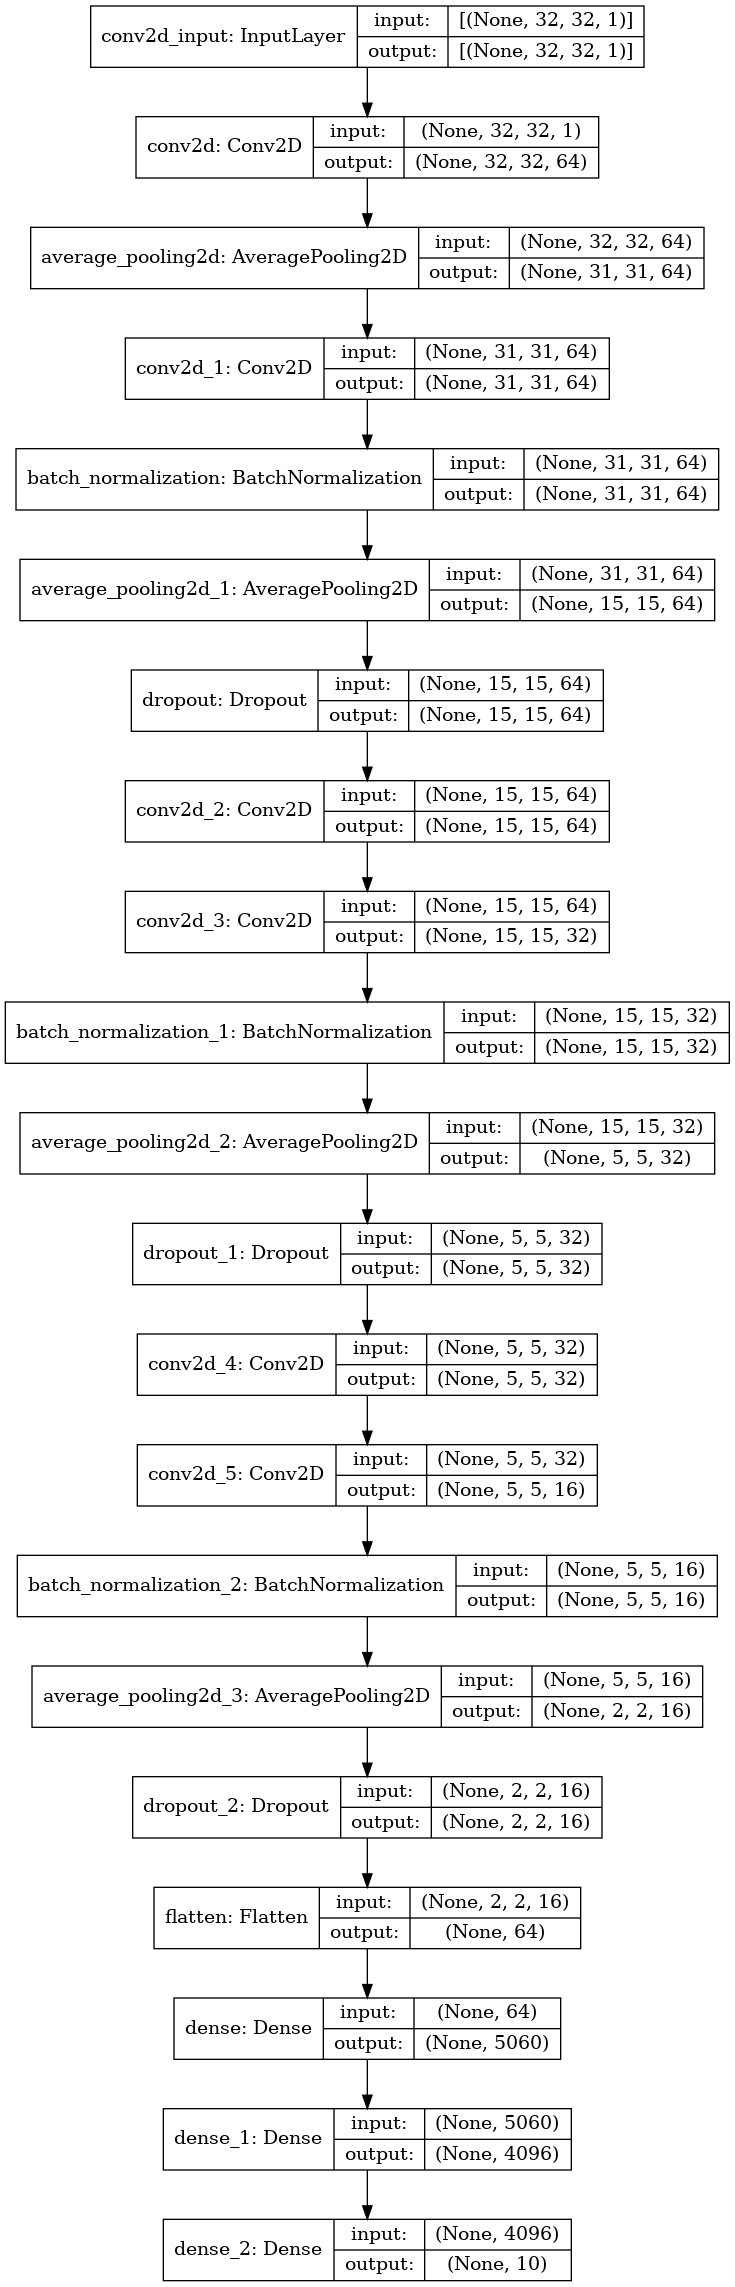

In [22]:
#from plot_model import plot_model
plot_model(model,to_file='model.png', dpi=96, rankdir = 'TB', show_layer_names=True, show_shapes=True) 

# <p style="background-color:#0E6B57;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Model Training</p>

In [23]:
history = model.fit(x=X_train_norm, y=y_train,
                   validation_split= 0.15,
                   epochs=50, verbose=1,
                   batch_size=64,
                   callbacks =[tensorboard, checkpoint, reduce_lr])

2023-01-19 06:07:36.114239: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2023-01-19 06:07:37.742742: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


  1/558 [..............................] - ETA: 1:08:16 - loss: 2.3162 - accuracy: 0.0625

2023-01-19 06:07:43.543034: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2023-01-19 06:07:43.543084: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


  2/558 [..............................] - ETA: 3:17 - loss: 2.4158 - accuracy: 0.0859   

2023-01-19 06:07:43.878122: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2023-01-19 06:07:43.878736: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2023-01-19 06:07:44.013600: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 242 callback api events and 239 activity events. 
2023-01-19 06:07:44.022170: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2023-01-19 06:07:44.036878: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/train/plugins/profile/2023_01_19_06_07_44

2023-01-19 06:07:44.042536: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2023_01_19_06_07_44/8b81219f6d3b.trace.json.gz
2023-01-19 06:07:44.063120: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/train/plug

558/558 [==============================] - 16s 15ms/step - loss: 1.4092 - accuracy: 0.5074 - val_loss: 1.0221 - val_accuracy: 0.6868

Epoch 00001: val_accuracy improved from -inf to 0.68683, saving model to custom_model.h5
Epoch 2/50
558/558 [==============================] - 7s 13ms/step - loss: 0.8014 - accuracy: 0.7415 - val_loss: 0.4946 - val_accuracy: 0.8444

Epoch 00002: val_accuracy improved from 0.68683 to 0.84444, saving model to custom_model.h5
Epoch 3/50
558/558 [==============================] - 7s 13ms/step - loss: 0.6913 - accuracy: 0.7805 - val_loss: 0.5726 - val_accuracy: 0.8178

Epoch 00003: val_accuracy did not improve from 0.84444
Epoch 4/50
558/558 [==============================] - 8s 14ms/step - loss: 0.6266 - accuracy: 0.7985 - val_loss: 0.4866 - val_accuracy: 0.8522

Epoch 00004: val_accuracy improved from 0.84444 to 0.85222, saving model to custom_model.h5
Epoch 5/50
558/558 [==============================] - 7s 13ms/step - loss: 0.5862 - accuracy: 0.8136 - val

In [42]:
def accuracy_lr_loss_plot():
    fig = plt.figure(figsize=(15,6))
    
    plt.subplot(131)
    plt.plot(history.history['accuracy'],'bo--', label = "accuracy")
    plt.plot(history.history['val_accuracy'], 'go--', label = "val_accuracy")
    plt.title("Training Data Accuracy Measurements")
    plt.xlabel("No of Epochs")
    plt.ylabel("Accuracy")
    plt.grid()
    plt.legend()
    plt.tight_layout()
    
    plt.subplot(132)
    plt.plot(history.history['lr'], 'bo--', label = 'learning Rate')
    plt.title("Learning Rate Measurements")
    plt.xlabel("No of Epochs")
    plt.ylabel("Learning Rate")
    plt.grid()
    plt.legend()
    plt.tight_layout()
    
    plt.subplot(133)
    plt.plot(history.history['loss'], 'bo--', label = 'loss')
    plt.plot(history.history['val_loss'], 'ro--', label = 'val_loss')
    plt.title("Training Data Loss Measurements")
    plt.xlabel("No of Epochs")
    plt.ylabel("Loss")
    plt.grid()
    plt.legend()
    plt.tight_layout()
    
    plt.show()


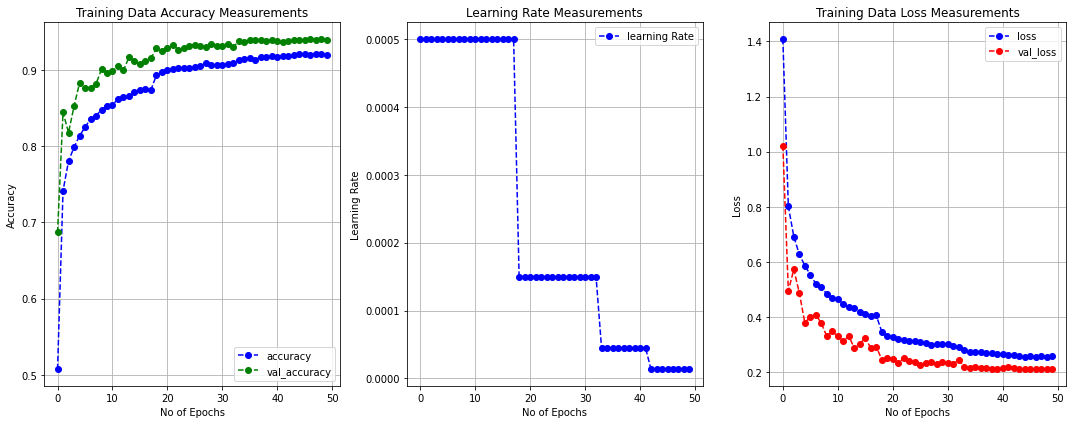

In [25]:
accuracy_lr_loss_plot()

In [26]:
train_score= model.evaluate(X_train_norm, y_train)
print("\nWe have training loss {:.3f} and training accuracy {:.3f}% after evaluation."
      .format(train_score[0], train_score[1]*100))

1313/1313 [==============================] - 5s 4ms/step - loss: 0.1576 - accuracy: 0.9525

We have training loss 0.158 and training accuracy 95.248% after evaluation.




# <p style="background-color:#0E6B57;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Model Prediction</p>

In [27]:
y_pred = model.predict(X_test_norm)

y_pred = np.argmax(y_pred, axis =1)

y_pred

array([1, 7, 2, ..., 7, 8, 2])

In [28]:
score = model.evaluate(X_test_norm, y_test)

print("\nWe have perform test with new data and the result of testing loss {:.3f} and testing accuracy {:.3f}% after evaluation."
          .format(score[0], score[1]*100))

563/563 [==============================] - 2s 4ms/step - loss: 0.2142 - accuracy: 0.9379

We have perform test with new data and the result of testing loss 0.214 and testing accuracy 93.794% after evaluation.


# <p style="background-color:#0E6B57;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Confusion Matrix and ROC Curve</p>

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1814
           1       0.92      0.94      0.93      1828
           2       0.96      0.94      0.95      1803
           3       0.94      0.91      0.92      1719
           4       0.95      0.95      0.95      1812
           5       0.92      0.94      0.93      1768
           6       0.92      0.93      0.93      1832
           7       0.95      0.95      0.95      1808
           8       0.94      0.91      0.93      1812
           9       0.94      0.93      0.94      1804

    accuracy                           0.94     18000
   macro avg       0.94      0.94      0.94     18000
weighted avg       0.94      0.94      0.94     18000



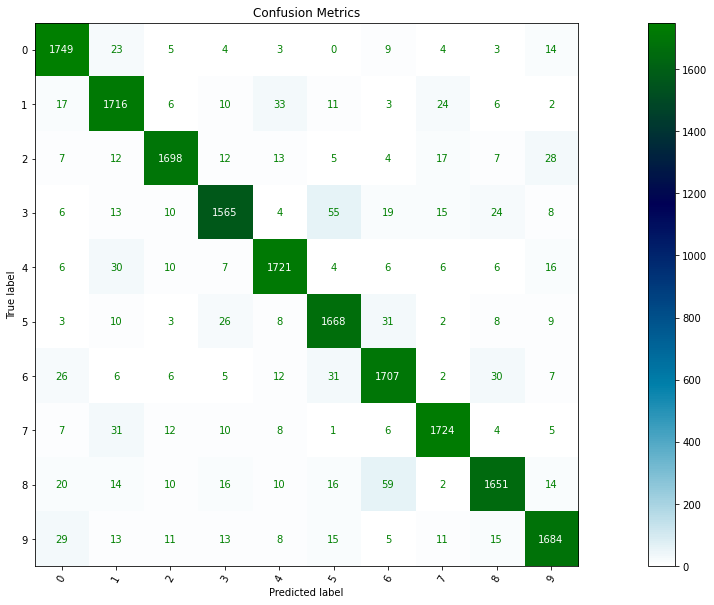

In [30]:
cm = confusion_matrix(y_test, y_pred)

display_cm = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(25,10)) 
display_cm.plot(cmap='ocean_r',ax=ax,xticks_rotation=60)
plt.title("Confusion Metrics")
plt.show()

**y_test and y_pred status**

In [31]:
from collections import Counter
print("type of y_test {} and type of y_pred {}".format(type(y_test),type(y_pred)))

y_test_count = Counter(y_test)
y_pred_count = Counter(y_pred)

print("count y_test values: \n \n {} \n count y_pred values: \n \n {}".format(y_test_count, y_pred_count))


type of y_test <class 'numpy.ndarray'> and type of y_pred <class 'numpy.ndarray'>
count y_test values: 
 
 Counter({6: 1832, 1: 1828, 0: 1814, 8: 1812, 4: 1812, 7: 1808, 9: 1804, 2: 1803, 5: 1768, 3: 1719}) 
 count y_pred values: 
 
 Counter({0: 1870, 1: 1868, 6: 1849, 4: 1820, 7: 1807, 5: 1806, 9: 1787, 2: 1771, 8: 1754, 3: 1668})


# <p style="background-color:#0E6B57;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">ROC Curve</p>

In [32]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize #for categorical to binary conversion
from sklearn import metrics #for call auc metrics
from itertools import cycle #for color cycle

def auc_roc_cruve():
    print("++++++++++++++++++++ AUC and ROC Details ++++++++++++++++++++++++" )
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=9) #highest label
    auc_score = auc(fpr, tpr)
    print("shape of y_test is {} and y_pred is {}".format(y_test.shape, y_pred.shape))
    print("auc score is {}".format(auc_score))
    
    y_test_bin = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7,8,9])
    
    print("total no of classes: {}".format(y_test_bin[1].shape))
          
    y_pred_bin = label_binarize(y_pred, classes=[0,1,2,3,4,5,6,7,8,9])
    
    print("after binarization of y_test_bin is \n {} \n \n and y_pred_bin is \n {}".format(y_test_bin, y_pred_bin))
          
    
    #create roc_curve and auc 
    n_classes = len(np.unique(y_test))
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    print("==================================================================================================")
          
    print("Create ROC CURVE for Multi-Classes")
    
    lw=2

    colors = cycle(['blue', 'red', 'green', 'yellow', 'magenta', 'orange', 'indigo', 'purple', 'olive', 'black' ])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                         ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC CURVE of multi-class data')
    plt.legend(loc="lower right")
    plt.show()
    

**AUC and ROC Details**

++++++++++++++++++++ AUC and ROC Details ++++++++++++++++++++++++
shape of y_test is (18000,) and y_pred is (18000,)
auc score is 0.9592855624202192
total no of classes: (10,)
after binarization of y_test_bin is 
 [[0 1 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 1 ... 0 0 0]] 
 
 and y_pred_bin is 
 [[0 1 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 1 ... 0 0 0]]
Create ROC CURVE for Multi-Classes


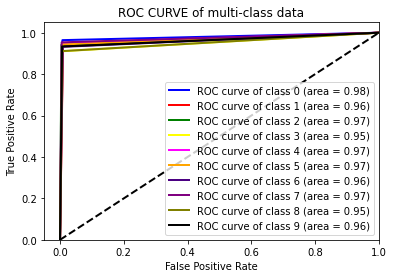

In [33]:
auc_roc_cruve()

# <p style="background-color:#0E6B57;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Create Function to upload image and resulted output</p>

**New Images**

In [34]:
import glob as glob

def ImageDataLoader(Number_of_images, no_rows, no_cols):
    imagePath = glob.glob( "/kaggle/input/new-images/testing image/*.jpg")
    cv_img = []

    for img in imagePath:
    
        img = cv2.imread(img)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (X_train.shape[1], X_train.shape[1]))#32X32   
        cv_img.append(img)
        #print(cv_img)
        
    #to plot 5X5 images
    fig = plt.figure(figsize=(15,15))
    for i in range(0,Number_of_images):
        fig.add_subplot(no_rows, no_cols, i+1)
        plt.imshow(cv_img[i])

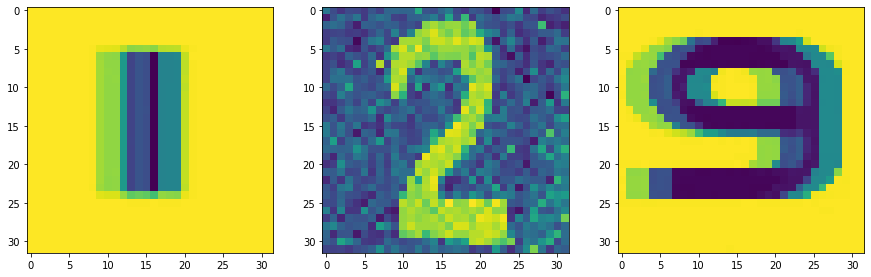

In [35]:
#New images
ImageDataLoader(3, 1, 3)

**Predict the New Images**

In [36]:
def imagePrediction(upload):
    for name, fileinfo  in uploader.value.items():
        img = Image.open(io.BytesIO(fileinfo['content']))
    
    images = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2GRAY)
    images = cv2.resize(images,(X_train.shape[1], X_train.shape[1]))
    images = images.reshape(1, X_train.shape[1], X_train.shape[1], 1)
    prd = model.predict(images)
    prd = np.argmax(prd, axis = 1)
    
    if prd==0:
        prd="Value is: 0"
    elif prd==1:
        prd="Value is: 1"
    elif prd==2:
        prd="Value is: 2"
    elif prd==3:
        prd="Value is: 3"
    elif prd==4:
        prd="Value is: 4"
    elif prd==5:
        prd="Value is: 5"
    elif prd==6:
        prd="Value is: 6"
    elif prd==7:
        prd="Value is: 7"
    elif prd==8:
        prd="Value is: 8"
    elif prd==9:
        prd="Value is: 9"
    
    if prd!=1:
        print(f"Model Predict That is a {prd}")
        

In [37]:
uploader = widgets.FileUpload()
display(uploader)

FileUpload(value={}, description='Upload')

In [38]:
button=widgets.Button(description="Predict")
out=widgets.Output()

def on_button_click(_): 
    with out:
        clear_output()
        try: 
            imagePrediction(uploader)
        except:
            print("Enter the correct image file")
button.on_click(on_button_click)
widgets.VBox([button, out])

**Uploaded Image**

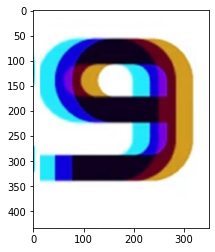

In [39]:
image_dir = "/kaggle/input/new-images/testing image/sam-3.jpg"
imageData=cv2.imread(image_dir)
plt.imshow(imageData)
plt.show()


# <p style="background-color:#0E6B57;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Summary</p>

We have created customized model for the Recognizing Street View Housing Number over **Gray Image** using the **SVHN_single_grey1.h5** file. Model accuracy is **95.248%** for training and **93.794%** for testing. 

By working on with layers/normalization/ image Data Genaration, we can improve the accuracy and drop down the loss.

# <p style="background-color:#0E6B57;font-family:newtimeroman;color:#EBDEF0;font-size:180%;text-align:center;border-radius:10px 10px;">Save and Load Model</p>

**save model**

In [ ]:
import os #to access directory
from tensorflow.keras.models import load_model

#create directory
models=os.makedirs("../working/models")

#model path
modelsPath="../working/models"

#to save model
model.save(os.path.join(modelsPath,"buildModel.h5"))




**load model**

In [41]:
#to load model

modelData=load_model("../working/models/buildModel.h5")